---

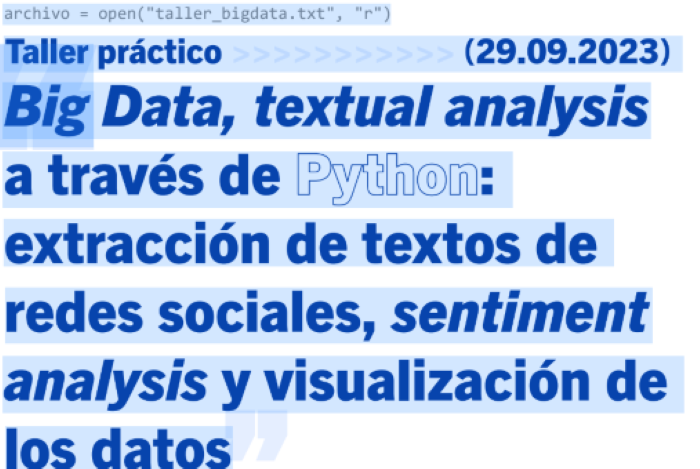

---

# Primera parte
---
## Herramientas que vamos a utilizar en Colab

*  [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
*  [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*  [Transformers](https://huggingface.co/docs/transformers/index)
*  [Selenium](https://pypi.org/project/selenium/)
---

# [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
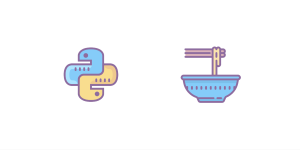
---
* BeautifulSoup 4 (bs4) es una biblioteca de Python utilizada para el web scraping y el análisis de páginas web HTML/XML.
* Proporciona una forma sencilla de extraer datos específicos de páginas web, permitiendo a los desarrolladores navegar a través del marcado HTML, identificar elementos deseados y acceder a su contenido o atributos.
* Es ampliamente utilizada para extraer información de sitios web.
---




url con feed RSS

1.   https://feeds.elpais.com/mrss-s/pages/ep/site/elpais.com/section/sociedad/portada



In [ ]:
#Esta línea importa la clase BeautifulSoup de la biblioteca bs4 y le asigna un alias 'bs'
from bs4 import BeautifulSoup as bs
#Esta línea importa la biblioteca requests, que se utiliza para realizar solicitudes HTTP a páginas web
import requests

In [ ]:
# Se establece un encabezado HTTP para simular un navegador web (User-Agent) en la solicitud.
headers = {"user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36"}
# Se hace una solicitud GET a la URL proporcionada con el encabezado especificado.
url = requests.get('https://feeds.elpais.com/mrss-s/pages/ep/site/elpais.com/section/sociedad/portada', headers)
# Se utiliza BeautifulSoup para analizar el contenido de la respuesta XML.
soup = bs(url.content, 'xml')

In [ ]:
# Busca todos los elementos <entry> en el documento HTML y los almacena en la variable 'datas'.
datas = soup.find_all('item')
# Inicializa una lista vacía llamada 'entry' para almacenar la información extraída.
entries = []
# Itera a través de cada elemento <entry> en 'datas'.
for data in datas:
  # Extrae el texto del elemento 'title' dentro de 'data' y lo almacena en 'title'.
  title = data.title.text
  # Extrae el texto del elemento 'published' dentro de 'data' y lo almacena en 'published'.
  published = data.pubDate.text
  # Extrae el texto del elemento 'link' dentro de 'data' y lo almacena en 'link'.
  link = data.link.text
  # Extrae el texto del elemento 'creator' dentro de 'data' y lo almacena en 'creator'.
  creator = data.creator.text
  # Extrae el texto del elemento 'description' dentro de 'data' y lo almacena en 'description'.
  description = data.description.text
  # Agrega una tupla con los valores extraídos a la lista 'entry'.
  entries.append((title, published, link, creator, description))
  # Imprime los valores extraídos para cada elemento <entry> con formato.
  print(f"Título:{title}",
        f"\n Publicado: {published}",
        f"\n Enlace: {link}",
        f"\n Author: {creator}",
        f"\n Resumen: {description}",
        f"\n .......................")

# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
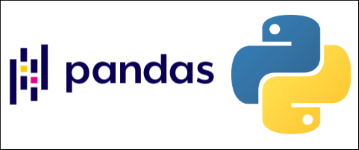
---
### Creación de un DataFrame
---
* Pandas es una poderosa biblioteca de Python utilizada para la manipulación y análisis de datos.
* Ofrece estructuras de datos flexibles como DataFrame, que permiten organizar y procesar datos tabulares de manera eficiente.
* Pandas se utiliza ampliamente en el campo del análisis de datos, permitiendo operaciones como filtrado, agregación y transformación de datos de manera intuitiva.
---

In [ ]:
# Importa la biblioteca "pandas" y la renombra como "pd"
import pandas as pd
# Importa la función "tqdm" desde la biblioteca "tqdm"
from tqdm import tqdm
# Configura "tqdm" para su uso con objetos "pandas"
tqdm.pandas()

In [ ]:
# Se crea un DataFrame llamado "df" a partir de la variable "entries" con las siguientes columnas: 'Title', 'Summary', 'Published', 'Category','Subject', 'Media', 'Link'
df = pd.DataFrame(entries, columns=['Title', 'Publicado', 'Enlace', 'Author', 'Resumen'])

In [ ]:
# Muestra las primeras filas del DataFrame 'df'
df.head()

# [Selenium](https://pypi.org/project/selenium/)
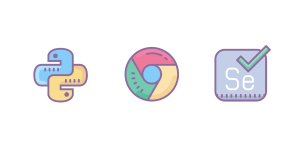

---
* Selenium es una biblioteca ampliamente utilizada para la automatización web y la interacción con páginas web dinámicas.
* Permite simular la interacción humana con el navegador, lo que facilita la automatización de acciones como hacer clic en enlaces, introducir datos en formularios y realizar scraping de datos en páginas web
---

In [ ]:
# Instala la biblioteca 'selenium', que es una herramienta de automatización de navegadores web.
!pip install selenium
# Instala la biblioteca 'webdriver_manager', que es útil para administrar controladores web necesarios para la automatización de navegadores.
!pip install webdriver_manager

In [ ]:
# Importar la biblioteca 'time' para manejar el tiempo en el script.
import time
# Importar la clase 'webdriver' de Selenium para controlar el navegador web.
from selenium import webdriver
# Importar 'By' para utilizar estrategias de búsqueda de elementos en la página web.
from selenium.webdriver.common.by import By
# Importar 'Keys' para enviar teclas especiales al navegador, como Enter.
from selenium.webdriver.common.keys import Keys
# Importar 'Service' para configurar el servicio de Chrome WebDriver.
from selenium.webdriver.chrome.service import Service
# Importar 'ChromeDriverManager' para gestionar automáticamente la descarga y configuración del controlador de Chrome.
from webdriver_manager.chrome import ChromeDriverManager
# Importar 'Chrome' para utilizar el controlador específico de Chrome.
from selenium.webdriver import Chrome

In [ ]:
# Configurar las opciones de Chrome
chrome_options = webdriver.ChromeOptions()
# Agregar el argumento '--headless' para asegurarse de que la interfaz gráfica esté desactivada
chrome_options.add_argument('--headless')
# Agregar el argumento '--no-sandbox'
chrome_options.add_argument('--no-sandbox')
# Agregar el argumento '--disable-dev-shm-usage'
chrome_options.add_argument('--disable-dev-shm-usage')
# Configurar el servicio del controlador de Chrome utilizando ChromeDriverManager
service = Service(ChromeDriverManager().install())
# Configurar el controlador de WebDriver de Chrome con las opciones definidas anteriormente
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
# Lista para almacenar los nombres de los usuarios que comentaron.
user = []
# Lista para almacenar los comentarios.
comments = []
# Lista para almacenar la cantidad de "Me gusta" en cada comentario.
likes = []
# Número máximo de comentarios a extraer.
max_comments = 400

# Abre el navegador web y carga un video de YouTube.
driver.get("https://www.youtube.com/watch?v=7o2uTm3DFt8")

try:
  # Utiliza una barra de progreso para mostrar el progreso de la extracción de comentarios.
  with tqdm(total=max_comments) as pbar:
    # Mientras la cantidad de comentarios sea menor que el máximo deseado...
    while len(comments) < max_comments:
        # Desplaza hacia abajo la página para cargar más comentarios.
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(3)  # Espera 3 segundos para cargar más comentarios.

        # Encuentra los elementos HTML que contienen los nombres de los autores, los comentarios y la cantidad de "Me gusta".
        authors = driver.find_elements(By.ID, "author-text")
        comment_elements = driver.find_elements(By.ID, "content-text")
        like_elements = driver.find_elements(By.ID, "vote-count-middle")

        # Itera sobre los elementos encontrados y agrega la información a las listas correspondientes.
        for author, comment, like_element in zip(authors, comment_elements, like_elements):
            user.append(author.text)
            comments.append(comment.text)
            likes.append(like_element.text)

        # Actualiza la barra de progreso con la cantidad de comentarios extraídos en esta iteración.
        pbar.update(len(authors))

        # Si se alcanza el número máximo de comentarios deseado, se detiene la extracción.
        if len(comments) == max_comments:
          break

except Exception as e:
    # En caso de un error, imprime un mensaje de error.
    print(f"Ocurrió un error: {str(e)}")

# Cierra el navegador web.
driver.quit()
# Devuelve la cantidad total de comentarios extraídos.
len(comments)

In [ ]:
# Combinar las listas 'user', 'comments' y 'likes' en un objeto zip.
# Esto crea un iterable de tuplas donde cada tupla contiene un elemento de cada lista en la misma posición.
a = zip(user, comments, likes)
# Crear un DataFrame a partir de la variable 'a'.
df = pd.DataFrame(a)
# Renombrar las columnas del DataFrame para que tengan nombres específicos.
df = df.rename(columns={0:'user', 1: 'text', 2: 'likes'})
# Mostrar las primeras filas del DataFrame (por defecto, las primeras 5 filas).
df.head()

# [Sentiment Analysis](https://huggingface.co/models)
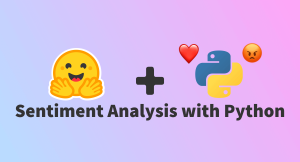
---
* El análisis de sentimiento es una técnica de procesamiento de lenguaje natural que evalúa y determina la emoción o el tono de un texto, generalmente clasificándolo como positivo, negativo o neutro.
* Este proceso ayuda a comprender la opinión, el estado de ánimo o la actitud de los autores hacia un tema específico y se utiliza ampliamente en aplicaciones como la análisis de opiniones de clientes, el monitoreo de redes sociales y la evaluación de reseñas de productos.
* El análisis de sentimiento se basa en algoritmos de aprendizaje automático y procesamiento lingüístico para realizar estas evaluaciones de manera automática.
---





In [ ]:
# Instalar la biblioteca "transformers"
!pip install transformers
# Instalar la biblioteca "sentencepiece"
!pip install sentencepiece

In [ ]:
# Esta biblioteca se utiliza comúnmente en el procesamiento del lenguaje natural (NLP) y el aprendizaje automático
from transformers import pipeline

In [ ]:
# Ruta al modelo pre-entrenado de análisis de sentimientos en Twitter
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# Crear un clasificador utilizando el modelo y el tokenizador especificados
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
classifier('La fascinación por la misteriosa tumba de la era de Alejandro Magno')

In [ ]:
def get_sentiment(text):
    # Esta línea llama a una función "classifier" con el texto proporcionado como entrada y almacena los resultados en la variable "results".
    results = classifier(text)
    # Aquí se obtiene la etiqueta de sentimiento del primer resultado en "results" y se almacena en "sentiment_label".
    sentiment_label = results[0]['label']
    # Esta línea obtiene el valor de sentimiento del primer resultado en "results" y lo almacena en "sentiment_value".
    sentiment_value = results[0]['score']
    # Finalmente, la función devuelve la etiqueta de sentimiento y el valor de sentimiento como una tupla.
    return sentiment_label, sentiment_value

In [ ]:
# Estas líneas de código realizan dos operaciones en el DataFrame 'df':
# 1. Utilizan la función 'progress_apply' en la columna 'Title' para aplicar la función 'get_sentiment' a cada fila.
# 2. Luego, aplican la función 'pd.Series' a los resultados de 'get_sentiment', creando así dos nuevas columnas en el DataFrame 'df'.
#    Estas columnas se llaman 'sentiment_label' y 'sentiment_value'.
df[['sentiment_label', 'sentiment_value']] = df['text'].progress_apply(get_sentiment).apply(pd.Series)

In [ ]:
df.head()

# Segunda parte
---
### Exportar los datos

---
Herramientas que vamos a utilizar

*  [Flourish](https://app.flourish.studio/projects)
*  [Voyant-tools](https://voyant-tools.org/)
*  [DataWrapper](https://app.datawrapper.de/)
---

In [ ]:
# exporta los datos contenidos en 'df' a un archivo de Excel para que puedas guardar y compartir tu información en formato de hoja de cálculo de Excel.
df.to_excel('test.xlsx')